# Chapter 4 Simple Regression with Wrong Prior

- The parameter estimation by Stan seems stable.
- The parameters do not fit the data
- The noise level `sigma` has a very larger range than before (to accomodate the output variation)

In [23]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz
import cmdstanpy

22:20:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


22:20:17 - cmdstanpy - INFO - CmdStan done processing.


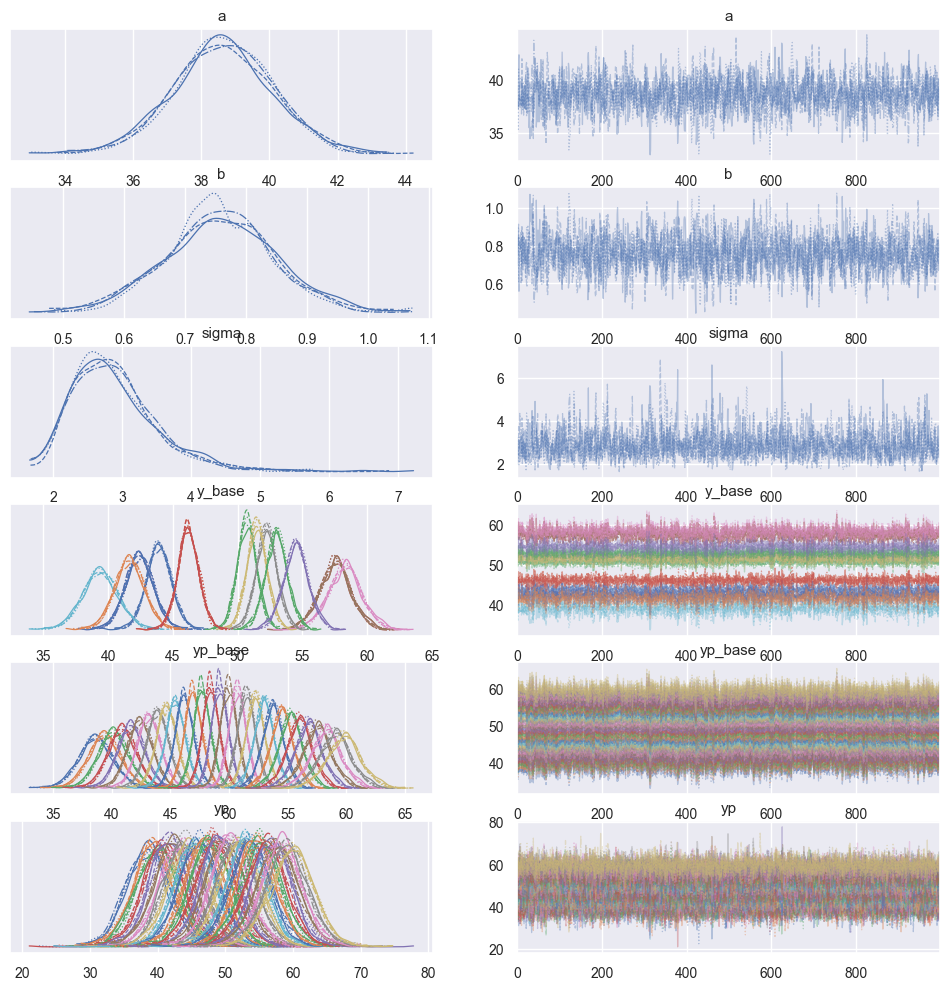

In [24]:
d = pandas.read_csv('input/data-salary.csv')
data = d.to_dict('list')
data.update({'N':len(d)})

Xp = np.arange(0, 29)
Np = len(Xp)
data.update({'Xp': Xp, 'Np': Np})

stan_file = 'model/model4-4b.stan'

model = cmdstanpy.CmdStanModel(stan_file=stan_file)
fit = model.sample(data=data, seed=123)

axes = arviz.plot_trace(fit)
fig = axes.ravel()[0].figure

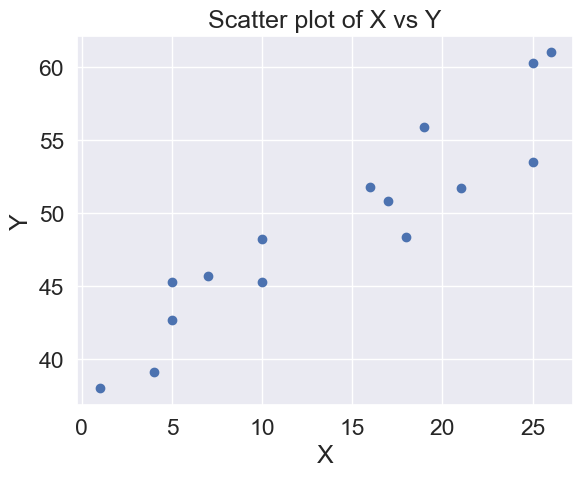

In [25]:
import matplotlib.pyplot as plt

plt.scatter(d.X, d.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

In [26]:
data 

{'X': [7, 10, 16, 25, 5, 25, 26, 18, 17, 1, 5, 4, 19, 10, 21],
 'Y': [45.7,
  48.2,
  51.8,
  53.5,
  42.7,
  60.3,
  61.0,
  48.4,
  50.8,
  38.0,
  45.3,
  39.1,
  55.9,
  45.3,
  51.7],
 'N': 15,
 'Xp': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 'Np': 29}

In [27]:
with open(stan_file, 'r') as f:
    stan_code = f.read()
print("// Stan Model code for model4-4")
print(stan_code)

// Stan Model code for model4-4
data {
  int N;
  vector[N] X;
  vector[N] Y;
  int Np;
  vector[Np] Xp;
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

transformed parameters {
  vector[N] y_base = a + b*X[1:N];
}

model {
  Y[1:N] ~ normal(y_base[1:N], sigma);
}

generated quantities {
  vector[Np] yp_base = a + b*Xp[1:Np];
  array[Np] real yp = normal_rng(yp_base[1:Np], sigma);
}



In [28]:
# Run the model with the data
model = cmdstanpy.CmdStanModel(stan_file=stan_file)

# Sample from the model through HMC-NUTS
fit = model.sample(data=data, seed=123)

22:20:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


22:20:20 - cmdstanpy - INFO - CmdStan done processing.


In [29]:
samples_df = fit.draws_pd()
print(samples_df.columns)
samples_df.describe()

Index(['chain__', 'iter__', 'draw__', 'lp__', 'accept_stat__', 'stepsize__',
       'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__', 'a', 'b',
       'sigma', 'y_base[1]', 'y_base[2]', 'y_base[3]', 'y_base[4]',
       'y_base[5]', 'y_base[6]', 'y_base[7]', 'y_base[8]', 'y_base[9]',
       'y_base[10]', 'y_base[11]', 'y_base[12]', 'y_base[13]', 'y_base[14]',
       'y_base[15]', 'yp_base[1]', 'yp_base[2]', 'yp_base[3]', 'yp_base[4]',
       'yp_base[5]', 'yp_base[6]', 'yp_base[7]', 'yp_base[8]', 'yp_base[9]',
       'yp_base[10]', 'yp_base[11]', 'yp_base[12]', 'yp_base[13]',
       'yp_base[14]', 'yp_base[15]', 'yp_base[16]', 'yp_base[17]',
       'yp_base[18]', 'yp_base[19]', 'yp_base[20]', 'yp_base[21]',
       'yp_base[22]', 'yp_base[23]', 'yp_base[24]', 'yp_base[25]',
       'yp_base[26]', 'yp_base[27]', 'yp_base[28]', 'yp_base[29]', 'yp[1]',
       'yp[2]', 'yp[3]', 'yp[4]', 'yp[5]', 'yp[6]', 'yp[7]', 'yp[8]', 'yp[9]',
       'yp[10]', 'yp[11]', 'yp[12]', 'yp[13]', 'yp[14]

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,yp[20],yp[21],yp[22],yp[23],yp[24],yp[25],yp[26],yp[27],yp[28],yp[29]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.500000,500.500000,2000.500000,-21.536094,0.891978,0.382612,2.725750,8.387000,0.0,23.018648,...,53.015389,53.722395,54.534251,55.303941,55.939318,56.857673,57.650257,58.351114,59.089343,59.843569
std,1.118174,288.711081,1154.844867,1.301602,0.165974,0.053266,0.743421,4.402167,0.0,1.777629,...,3.012549,3.127005,3.029871,3.141217,3.089975,3.074116,3.196872,3.209650,3.270625,3.317284
min,1.000000,1.000000,1.000000,-29.431800,0.000003,0.313326,1.000000,1.000000,0.0,20.032500,...,38.579800,39.066600,42.561600,41.449700,42.839900,43.271700,45.750000,42.160600,44.762800,47.696700
25%,1.750000,250.750000,1000.750000,-22.154125,0.870855,0.342981,2.000000,7.000000,0.0,21.722800,...,51.108575,51.749200,52.593750,53.346050,53.960675,54.882425,55.644975,56.357475,56.984100,57.720425
50%,2.500000,500.500000,2000.500000,-21.209400,0.958061,0.382769,3.000000,7.000000,0.0,22.700050,...,53.036850,53.675200,54.544750,55.250550,55.990050,56.852600,57.642750,58.355300,59.080900,59.883900
75%,3.250000,750.250000,3000.250000,-20.560850,0.991294,0.422400,3.000000,15.000000,0.0,23.999600,...,54.959225,55.709425,56.476375,57.288175,57.930325,58.883325,59.707975,60.289175,61.185250,61.992400
max,4.000000,1000.000000,4000.000000,-19.931900,1.000000,0.451584,4.000000,31.000000,0.0,31.588200,...,66.526300,66.675500,67.248300,68.464400,68.209600,77.843400,73.243000,70.863500,74.547200,74.841600


In [30]:
draws = samples_df[['a', 'b', 'sigma']]
draws.head(4)

,a,b,sigma
0,39.0054,0.704182,2.59179
1,37.4332,0.757407,2.44123
2,38.4953,0.854463,3.13682
3,41.9511,0.635459,3.04872


In [31]:
import plotly.graph_objs as go
import plotly.offline as pyoff

trace = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=draws['sigma'],
    mode='markers',
    marker=dict(
        size=3,
        color=draws['sigma'],
        colorscale='Viridis',
        opacity=0.7
    )
)

layout = go.Layout(
    scene=dict(
        xaxis_title='a',
        yaxis_title='b',
        zaxis_title='sigma'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    height=700,
    width=1000,
)

proj_ab = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=[0] * len(draws),
    mode='markers',
    marker=dict(
        size=2,
        color='rgba(5,5,255,0.5)',
        opacity=0.3
    ),
    showlegend=False
)

layout.height = 700

fig = go.Figure(data=[trace, proj_ab], layout=layout)
pyoff.iplot(fig)

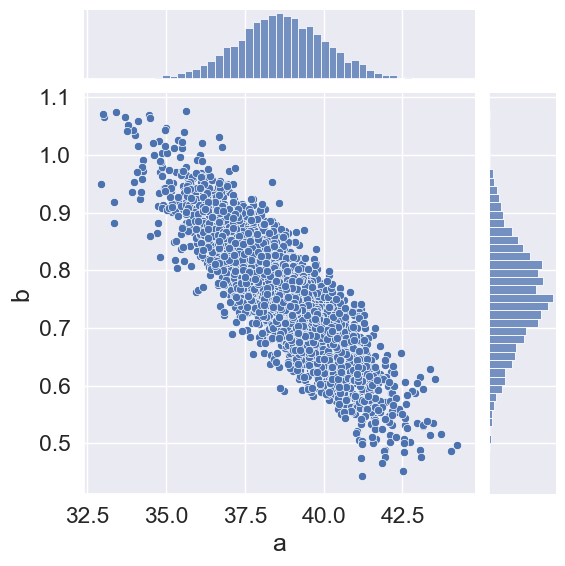

In [32]:
sns.set(font_scale=1.5)
p = sns.jointplot(data=draws, x='a', y='b')

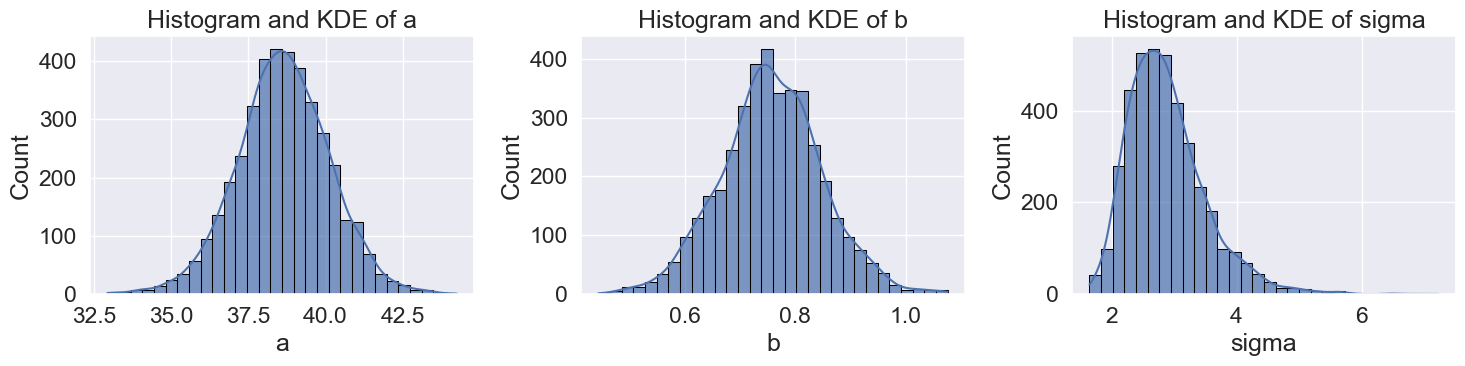

In [33]:
import seaborn as sns

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(draws['a'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('a')
plt.title('Histogram and KDE of a')

plt.subplot(1, 3, 2)
sns.histplot(draws['b'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('b')
plt.title('Histogram and KDE of b')

plt.subplot(1, 3, 3)
sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.title('Histogram and KDE of sigma')

plt.tight_layout()
plt.show()

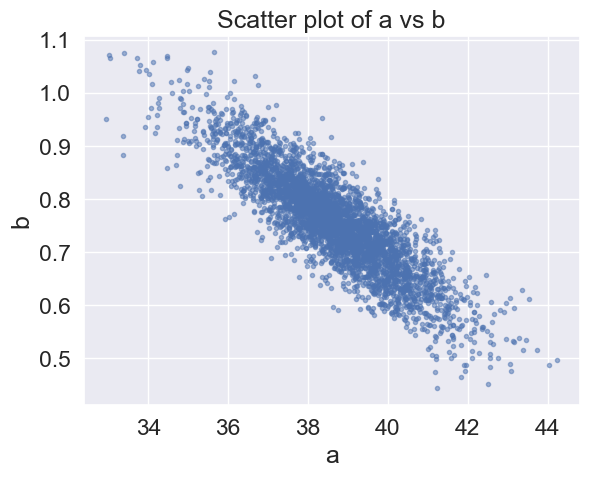

In [34]:
plt.scatter(draws['a'], draws['b'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter plot of a vs b')
plt.show()

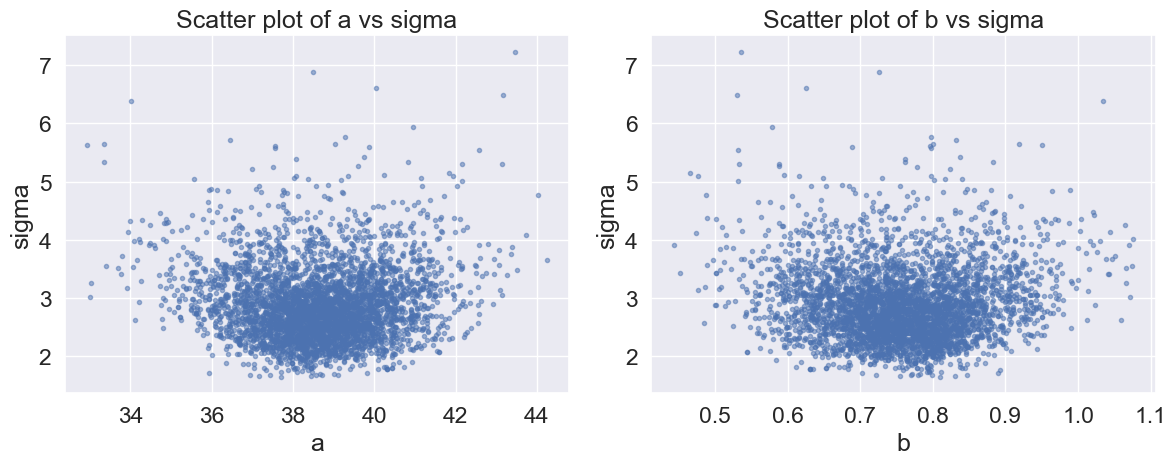

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(draws['a'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('sigma')
plt.title('Scatter plot of a vs sigma')

plt.subplot(1, 2, 2)
plt.scatter(draws['b'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('b')
plt.ylabel('sigma')
plt.title('Scatter plot of b vs sigma')

plt.tight_layout()
plt.show()

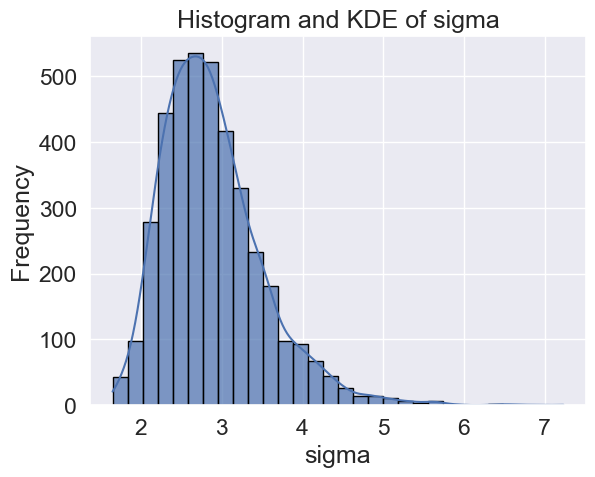

In [36]:
import seaborn as sns

sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Histogram and KDE of sigma')
plt.show()

In [37]:
draws_df = draws.copy()

# compute the mean and standard deviation of 'a', 'b', and 'sigma'
means = draws_df.mean(axis=0)
stds = draws_df.std(axis=0)
print(means['a'], means['b'], means['sigma'], stds['a'], stds['b'], stds['sigma'])
print(means.a, means.b, means.sigma, stds.a, stds.b, stds.sigma)

38.634201875 0.7568378505000001 2.88545945 1.4988682592555074 0.09190726741221526 0.6322996946648921
38.634201875 0.7568378505000001 2.88545945 1.4988682592555074 0.09190726741221526 0.6322996946648921


1 26


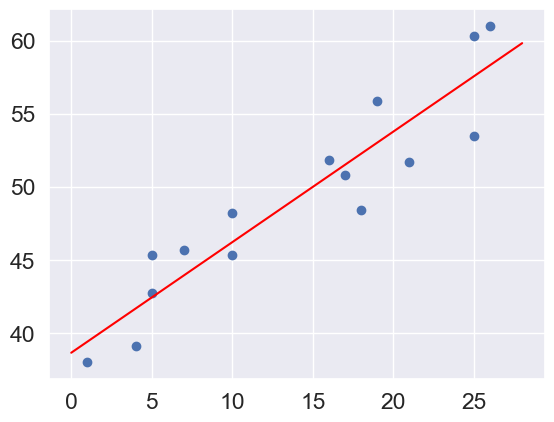

In [38]:
print(d.X.min(), d.X.max())
# Xp already defined for Stan sampling

ymean = means['a'] + means['b'] * Xp
plt.plot(Xp, ymean, color='red', label='Mean prediction')
plt.scatter(d.X, d.Y, label='Data points')

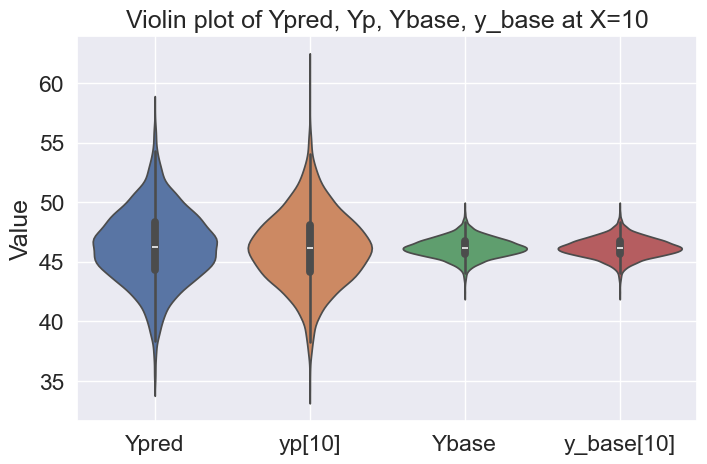

In [39]:
import seaborn as sns

# What would be the predicted value of Y when X=10?
Xpred = 10
Ybase = draws_df['a'] + draws_df['b'] * Xpred
Ypred = Ybase + np.random.normal(0, draws_df['sigma'], size=len(Ybase))

Ysamples10 = pd.DataFrame({'Ypred': Ypred, 'yp[10]': samples_df['yp[11]'], 'Ybase': Ybase, 'y_base[10]': samples_df['yp_base[11]']})

plt.figure(figsize=(8, 5))
sns.violinplot(data=Ysamples10, inner='box')
plt.ylabel('Value')
plt.title(f'Violin plot of Ypred, Yp, Ybase, y_base at X={Xpred}')
plt.grid(True)
plt.show()

In [40]:
Xp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [ ]:
# Xp = np.arange(0, 30)
Np = len(Xp)
N_ms = len(draws_df)

yp_base_ms = fit.stan_variable(var='yp_base')

qua = np.quantile(yp_base_ms, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]), \
    columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', yp_base_ms.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (29,)
Shape of Yp: (4000, 29)
Shape of Qua: (5, 29)
     X       2.5%        25%       50%       75%      97.5%
0  0.0  35.621138  37.694000  38.63205  39.62080  41.530970
1  1.0  36.544310  38.504275  39.38795  40.31655  42.127102
       X      2.5%        25%       50%        75%      97.5%
27  27.0  56.22683  58.173575  59.09640  59.949025  61.880555
28  28.0  56.80502  58.878125  59.85545  60.747450  62.789305


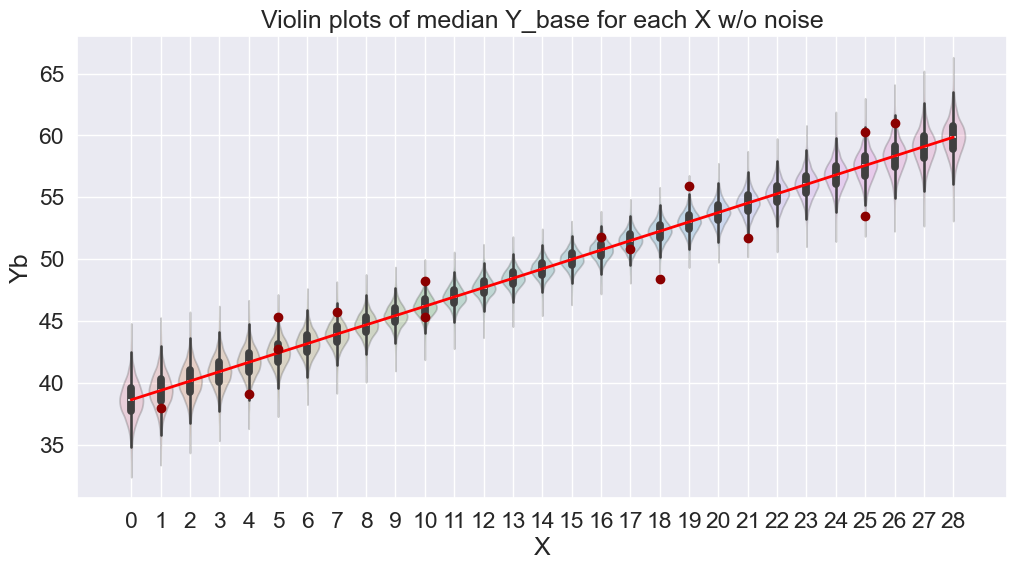

In [45]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(data=yp_base_ms, inner='box', alpha=.25)
plt.plot(Xp, d_est['50%'], color='red', label='Base prediction', linewidth=2)
plt.scatter(d.X, d.Y, color='darkred', label='Data points', zorder=10)
plt.xlabel('X')
plt.ylabel('Yb')
plt.grid(True)
plt.title('Violin plots of median Y_base for each X w/o noise')

plt.show()

In [46]:
print('Density Summary: :', d_est.shape)
print(d_est.head(2))

Density Summary: : (29, 6)
     X       2.5%        25%       50%       75%      97.5%
0  0.0  35.621138  37.694000  38.63205  39.62080  41.530970
1  1.0  36.544310  38.504275  39.38795  40.31655  42.127102


### Bayesian CI for baseline annual income
- Fig. 4.8 (in page 61)
- from 0 to 28 years of work experience
- For each X, CI is computed. The plot is a connection of those CIs.
- No measurement noise first.

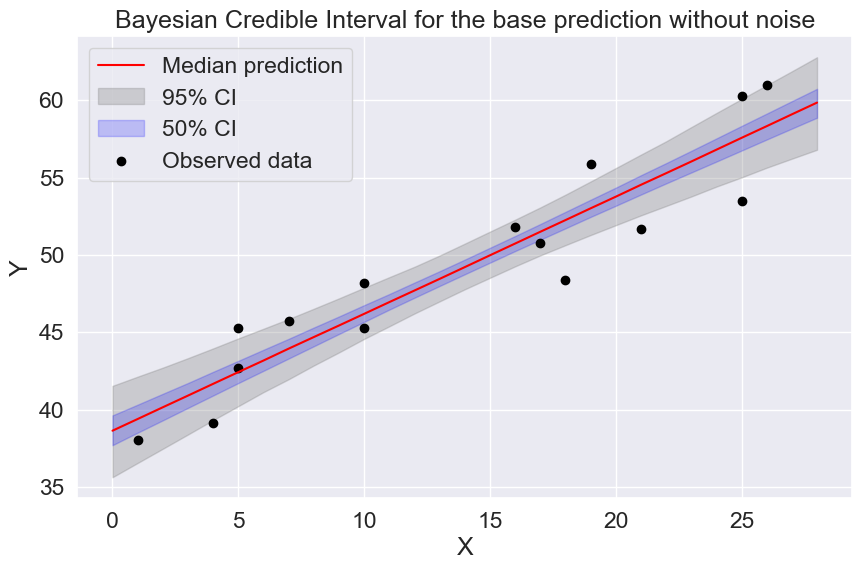

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for the base prediction without noise')
plt.legend()
plt.grid(True)
plt.show()

### Now with measurement noise
- See Fig. 4.8

In [50]:
yp_ms      = fit.stan_variable(var='yp')

# compute quantiles for the predictions with measurement noise
qua = np.quantile(yp_ms, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)

# make a DataFrame for the quantiles
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]),
                         columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', yp_ms.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (29,)
Shape of Yp: (4000, 29)
Shape of Qua: (5, 29)
     X       2.5%        25%       50%        75%      97.5%
0  0.0  31.955190  36.352525  38.56085  40.657275  45.230115
1  1.0  32.721165  37.408575  39.38350  41.501200  46.045148
       X       2.5%        25%      50%       75%      97.5%
27  27.0  52.692753  56.984100  59.0809  61.18525  65.633297
28  28.0  53.284312  57.720425  59.8839  61.99240  66.149668


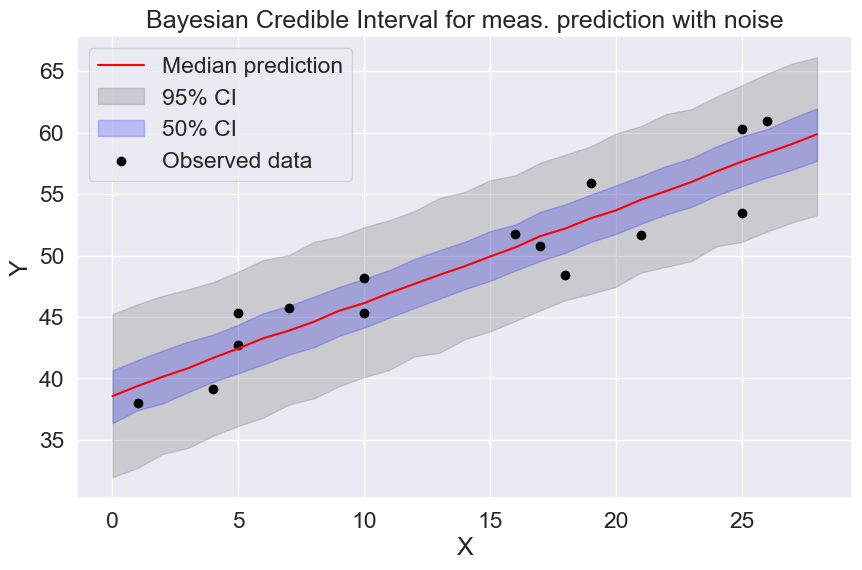

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for meas. prediction with noise')
plt.legend()
plt.grid(True)
plt.show()

## End.